# EDUNET FOUNDATION-Class Exercise Notebook

## LAB 1 - Demonstrating Random Forest on Credit Card Dataset

The literary meaning of word **‘ensemble’** is group. Ensemble methods involve group of predictive models to achieve a better accuracy and model stability. 

Ensemble methods are known to impart supreme boost to tree based models.

Like every other model, a tree based algorithm also suffers from the plague of **bias** and **variance**.

Decision trees are prone to overfitting.

Normally, as you increase the complexity of your model, in this case decision tree, you will see a reduction in training error due to lower bias in the model. As you continue to make your model more complex, you end up over-fitting your model and your model will start suffering from high variance.

A champion model should maintain a balance between these two types of errors. This is known as the trade-off management of bias-variance errors. 

**Ensemble learning is one way to tackle bias-variance trade-off.**

There are various ways to ensemble *weak* learners to come up with *strong* learners:

1. Bagging
2. Boosting
3. Stacking

# 1. Bagging

Bagging is an ensemble technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set. The following figure will make it clearer:

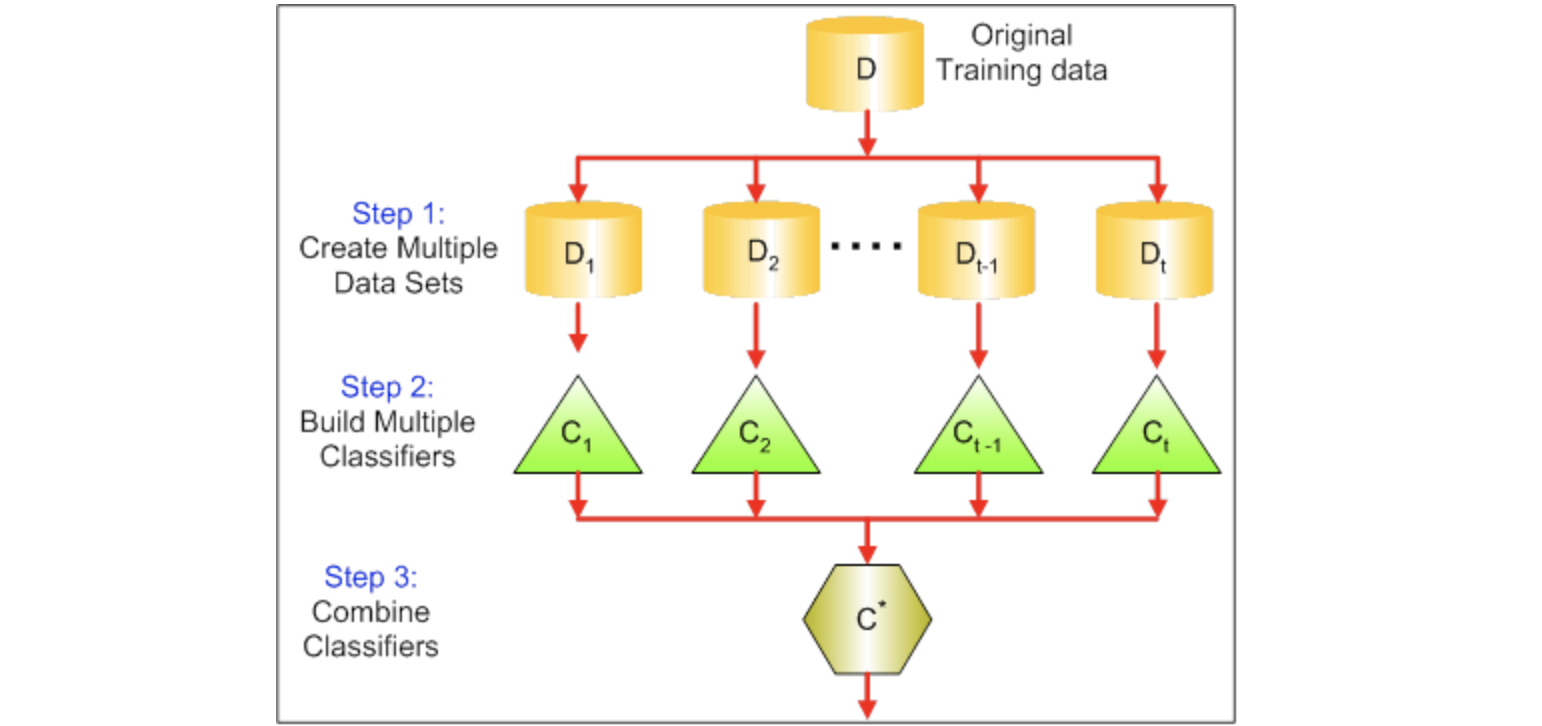

The steps followed in bagging are:

1. **Create Multiple DataSets:** Sampling is done with replacement on the original data and new datasets are formed.

2. **Build Multiple Classifiers:** Classifiers are built on each data set. Generally the same classifier is modeled on each data set and predictions are made.

3. **Combine Classifiers:** The predictions of all the classifiers are combined using a mean, median or mode value depending on the problem at hand.
The combined values are generally more robust than a single model.

Note that, here the number of models built is not a hyper-parameters. Higher number of models are always better or may give similar performance than lower numbers. 

**Important: It can be theoretically shown that the variance of the combined predictions are reduced to 1/n (n: number of classifiers) of the original variance, under some assumptions. (Think Central Limit Theorem)**

There are various implementations of bagging models. Random forest is one of them and we’ll discuss it next.

## **Random Forest**

*   In Random Forest, we grow multiple trees as opposed to a single tree in CART model.
*   We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
*   To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
*   The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

#### **How does it work?**

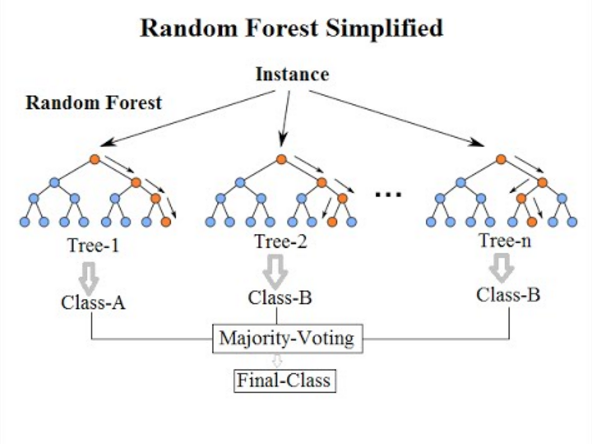

It works in the following manner:

*   Assume number of rows in the training set is N. Then, a sample of n < N rows is taken at random but *with replacement.* This sample will be the training set for growing the tree.
*   If there are M input variables, a number m < M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
*   Each tree is grown to the largest extent possible and  there is no pruning.
*   Predict new data by aggregating the predictions of the n tree trees (i.e., majority votes for classification, average for regression).

#### **Advantages**

*   This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
*   RF has the power of handling large datasets with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).
*   It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data is missing.
*   It has methods for balancing errors in data sets where classes are imbalanced.
*   The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
*   Random Forest involves sampling of the input data with replacement called as bootstrap sampling. Here one third (say) of the data is not used for training and can be used to testing. These are called the out of bag samples. Error estimated on these out of bag samples is known as out of bag error. Out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

#### **Disadvantages**

*   It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.
*   Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds!

# 2. Boosting

Boosting fit a sequence of weak learners − models that are only slightly better than random guessing, such as small decision trees − to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.


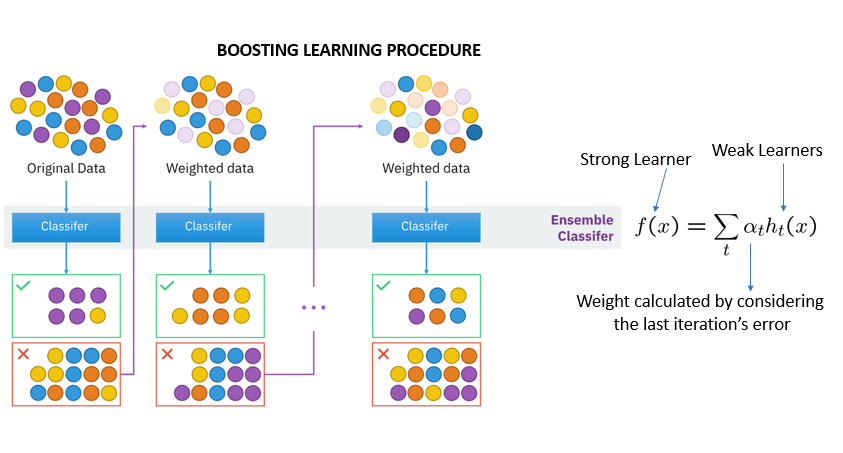

There are many boosting algorithms which impart additional boost to model’s accuracy:

1. Gradient Boosting Machine
2. XGBoost
3. AdaBoost
4. LightGBM
5. CatBoost

### **Gradient Boosting Machine**

Gradient Boosting Machine (GBM) builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

#### **How does it work?**

*   Let's take a dataset {$ (x_{1}, y_{1}) , (x_{2}, y_{2}) , (x_{3}, y_{3}), ...., (x_{n}, y_{n})$}
*   Choose a loss function, let's say MSE.
*   Fit a naive model on the dataset, a simple tree or just take $ \bar{y} $, call this model $ F_{0}(x) $

First interation

*   Get residuals of all predictions,  $ r_{i1}(x) = y_{i}- F_{0}(x_{i})$
*   Fit a model (can be regression tree) on residuals {$ (x_{1}, r_{11}) , (x_{2}, r_{21}) , (x_{3}, r_{31}), ...., (x_{n1}, r_{n1})$}, call this model $ h_{1}(x) $
*   New predictor is $ F_{1}(x) = F_{0}(x) + \gamma_{1} h_{1}(x) $. Find $\gamma_{1}$ which minimizes MSE.

Second iteration

*   Get residuals of all predictions,  $ r_{i2}(x) = y_{i}- F_{1}(x)$
*   Fit a model (can be regression tree) on residuals {$ (x_{1}, r_{12}) , (x_{2}, r_{22}) , (x_{3}, r_{32}), ...., (x_{n2}, r_{n2})$}, call this model $ h_{2}(x) $
*   New predictor is $ F_{2}(x) = F_{1}(x) + \gamma_{2} h_{2}(x) $. Find $\gamma_{2}$ which minimizes MSE.

and so on...

*   Get residuals of all predictions,  $ r_{im}(x) = y_{i}- F_{m-1}(x)$
*   Fit a model (can be regression tree) on residuals {$ (x_{1}, r_{1m}) , (x_{2}, r_{2m}) , (x_{3}, r_{3m}), ...., (x_{nm}, r_{nm})$}, call this model $ h_{m}(x) $
*   **Final predictor** is $ F_{m}(x) = F_{m-1}(x) + \gamma_{m} h_{m}(x) $. Find $\gamma_{m}$ which minimizes MSE.

### **XGBoost**

Extreme Gradient Boosting (XGBoost) is just an extension of gradient boosting with the following added advantages:

1. **Regularization:** Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
In fact, XGBoost is also known as ‘regularized boosting‘ technique.

2. **Parallel Processing:** XGBoost implements parallel processing and is blazingly faster as compared to GBM.
But hang on, we know that boosting is sequential process so how can it be parallelized? We know that each tree can be built only after the previous one, but to make a tree it uses all the cores of the system.
XGBoost also supports implementation on Hadoop.

3. **High Flexibility:** XGBoost allow users to define custom optimization objectives and evaluation criteria. This adds a whole new dimension to the model and there is no limit to what we can do.

4. **Handling Missing Values:** XGBoost has an in-built routine to handle missing values. User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.

5. **Tree Pruning:** A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

6. **Built-in Cross-Validation:** XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
This is unlike GBM where we have to run a grid-search and only a limited values can be tested.

7. **Continue on Existing Model:** User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
GBM implementation of sklearn also has this feature so they are even on this point.

# 3. Stacking

**Stacking** or Stacked Generalization is an ensemble technique.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?

The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.

Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).

Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).
The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model.

**Level-0 Models (Base-Models):** Models fit on the training data and whose predictions are compiled.

**Level-1 Model (Meta-Model):** Model that learns how to best combine the predictions of the base models.
The meta-model is trained on the predictions made by base models on out-of-sample data. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.

# Bagging vs. Boosting

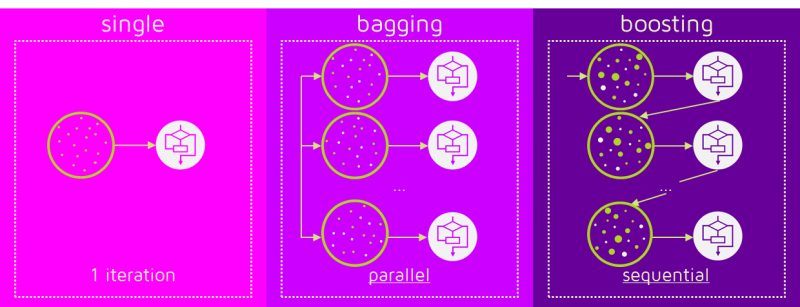

# Implementation

### The dataset has credit card transactions where our objective is to identify the fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [2]:
# Reading the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking the shape of our data
data.shape

(284807, 31)

In [5]:
# Checking the distribution of two classes in the target variable
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Clearly the dataset is heavily imbalanced!

In [6]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

* Split the dataset into train and test using stratified sampling on our dependent variable. 
* Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [8]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(227845, 30)

 The shape of test dataset :
(56962, 30)


In [9]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    227451
1       394
Name: Class, dtype: int64

 Distribution of classes of dependent variable in test :
0    56864
1       98
Name: Class, dtype: int64


In [11]:
# Hyperparameter tuning

classifier1 = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[10, 20], 'max_depth':[3, 5]}
classifier = GridSearchCV(classifier1, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [10, 20]},
             scoring='roc_auc')

Predicting on both train and test dataset using the fitted model

In [12]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [13]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

0.9995611051372644

In [14]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.9992977774656788

Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [15]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.8832311447590865

In [16]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.8213846068815821

In [17]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[227443,      8],
       [    92,    302]], dtype=int64)

In [18]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[56859,     5],
       [   35,    63]], dtype=int64)

Plot the variable importance

In [19]:
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_ ## if best_estimator not chosen so you will face error
indices = np.argsort(importances)

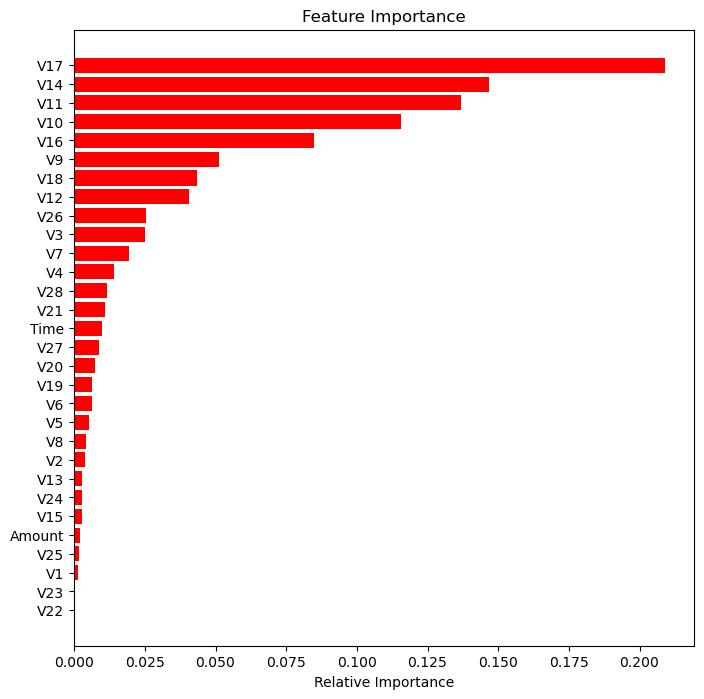

In [20]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()